In [1]:
import tensorflow as tf
tf.__version__

'2.8.2'

In [2]:
!pip uninstall tensorflow
# yes 눌러야함

Found existing installation: tensorflow 2.8.2+zzzcolab20220719082949
Uninstalling tensorflow-2.8.2+zzzcolab20220719082949:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/import_pb_to_tensorboard
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.7/dist-packages/tensorflow-2.8.2+zzzcolab20220719082949.dist-info/*
    /usr/local/lib/python3.7/dist-packages/tensorflow/*
Proceed (y/n)? y
  Successfully uninstalled tensorflow-2.8.2+zzzcolab20220719082949


In [3]:
!pip install tensorflow==1.15
# 끝나고 런타임 재시작 눌러야함

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 412.3 MB 27 kB/s 
     |████████████████████████████████| 503 kB 62.7 MB/s 
     |████████████████████████████████| 3.8 MB 60.0 MB/s 
     |████████████████████████████████| 50 kB 7.5 MB/s 
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7554 sha256=0d49e70536fd78ebee76ccaa8d36113e63df724c16b4e645bacfc424c5449aab
  Stored in directory: /root/.cache/pip/wheels/21/7f/02/420f32a803f7d0967b48dd823da3f558c5166991bfd204eef3
Successfully built gast
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:
      Successfully uninstalled tensorboard-2.8.0
  Attempting un

In [1]:
%cd /content/

/content


In [2]:
%rm -rf stylegan2/
!git clone https://github.com/woctezuma/stylegan2.git

Cloning into 'stylegan2'...
remote: Enumerating objects: 220, done.
remote: Total 220 (delta 0), reused 0 (delta 0), pack-reused 220
Receiving objects: 100% (220/220), 1.56 MiB | 40.00 MiB/s, done.
Resolving deltas: 100% (117/117), done.


In [4]:
%cd stylegan2/

[Errno 2] No such file or directory: 'stylegan2/'
/content/stylegan2


In [5]:
!nvcc test_nvcc.cu -o test_nvcc -run

CPU says hello.
GPU says hello.


In [6]:
!git checkout tiled-projector

Branch 'tiled-projector' set up to track remote branch 'tiled-projector' from 'origin'.
Switched to a new branch 'tiled-projector'


In [7]:
%mkdir -p /content/stylegan2/raw_images
%cd /content/stylegan2/raw_images/

/content/stylegan2/raw_images


In [8]:
# jpg파일로 해야함
from google.colab import files
files.upload()

Saving celea.jpg to celea.jpg


{'celea.jpg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x00`\x00`\x00\x00\xff\xdb\x00C\x00\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\xff\xdb\x00C\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\xff\xc0\x00\x11\x08\x01\xc2\x01\x9d\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06\x13Qa\x07"q\x142\x81\x91\xa1\x08#B\xb1\xc1\x15R\xd1\xf

In [9]:
!pwd

/content/stylegan2/raw_images


In [10]:
%cd /content/stylegan2

/content/stylegan2


In [31]:
!python align_images.py raw_images/ aligned_images/
# error뜰때는 from tensorflow.keras.utils import get_file로 바꾸면된다

64045056/64040097 [==============================] - 0s 0us/step


In [32]:
temporary_input_folder = 'aligned_images_B/'

%mkdir -p $temporary_input_folder
%cp aligned_images/*.png $temporary_input_folder

In [33]:
output_folder = 'generated_images_no_tiled/'

# clean_up_temporary_folder(temporary_input_folder, output_folder)
%ls $temporary_input_folder

celea_01.png


In [34]:
!python project_images.py aligned_images_B/ generated_images_no_tiled/ \
 --no-tiled

Loading networks from "gdrive:networks/stylegan2-ffhq-config-f.pkl"...
Setting up TensorFlow plugin "fused_bias_act.cu": Preprocessing... Loading... Done.
Setting up TensorFlow plugin "upfirdn_2d.cu": Preprocessing... Loading... Done.
Loading images from ".stylegan2-tmp/dataset/images"
Creating dataset ".stylegan2-tmp/dataset/tfrecords"
Added 1 images.
tcmalloc: large alloc 4294967296 bytes == 0x3c5be000 @  0x7f48c72d7001 0x7f48c45471af 0x7f48c459dc23 0x7f48c459ea87 0x7f48c4640823 0x5936cc 0x548c51 0x5127f1 0x549e0e 0x4bca8a 0x532b86 0x53786a 0x595ef6 0x5134a6 0x549576 0x593fce 0x548ae9 0x5127f1 0x549576 0x593fce 0x548ae9 0x5127f1 0x549e0e 0x593fce 0x5118f8 0x549576 0x604173 0x5f5506 0x5f8c6c 0x5f9206 0x64faf2
tcmalloc: large alloc 4294967296 bytes == 0x7f4676000000 @  0x7f48c72d51e7 0x7f48c45470ce 0x7f48c459dcf5 0x7f48c459df4f 0x7f48c4640673 0x5936cc 0x548c51 0x5127f1 0x549576 0x593fce 0x548ae9 0x5127f1 0x549576 0x593fce 0x548ae9 0x5127f1 0x549576 0x593fce 0x548ae9 0x5127f1 0x593dd7 0

In [35]:
def redirect_image_name_to_npy(image_name):
  npy_name = image_name.replace('.png', '.npy')

  return npy_name

In [36]:
import numpy as np

def load_latent_vector(image_name):
  latent_vector_name = redirect_image_name_to_npy(image_name)

  w = np.load(latent_vector_name)

  w = np.expand_dims(w, axis=0)

  return w

In [37]:
# 1. Set up StyleGAN

import dnnlib
import dnnlib.tflib as tflib
import pretrained_networks

network_pkl = 'gdrive:networks/stylegan2-ffhq-config-f.pkl'
_G, _D, Gs = pretrained_networks.load_networks(network_pkl)

Gs_kwargs = dnnlib.EasyDict()
Gs_kwargs.output_transform = dict(func=tflib.convert_images_to_uint8, nchw_to_nhwc=True)
Gs_kwargs.randomize_noise = False

Gs_syn_kwargs = dnnlib.EasyDict()
Gs_syn_kwargs.output_transform = dict(func=tflib.convert_images_to_uint8, nchw_to_nhwc=True)
Gs_syn_kwargs.randomize_noise = False
Gs_syn_kwargs.minibatch_size = 4

noise_vars = [
    var for name, var in Gs.components.synthesis.vars.items()
    if name.startswith('noise')
]
w_avg = Gs.get_var('dlatent_avg')
truncation_psi = 0.75

In [38]:
%cd /content/

/content


In [39]:
!rm -rf generators-with-stylegan2/
!git clone https://github.com/a312863063/generators-with-stylegan2.git

Cloning into 'generators-with-stylegan2'...
remote: Enumerating objects: 651, done.
remote: Counting objects: 100% (45/45), done.
remote: Compressing objects: 100% (45/45), done.
remote: Total 651 (delta 26), reused 0 (delta 0), pack-reused 606
Receiving objects: 100% (651/651), 28.24 MiB | 49.60 MiB/s, done.
Resolving deltas: 100% (338/338), done.


In [40]:
%cd /content/stylegan2/

/content/stylegan2


In [41]:
def get_expression_folder_name():
  expression_folder_name = '/content/generators-with-stylegan2/latent_directions/'

  return expression_folder_name

In [42]:
def get_expression_vector_file_name(expression_name):
  input_expression_folder_name = get_expression_folder_name()
  expression_vector_file_name = input_expression_folder_name + expression_name + '.npy'

  return expression_vector_file_name


#여기서 나오는 npy 파일들의 direction을 수정하면 다른 결과를 얻을 수 있는데 조정은 쉽지 않다.

In [43]:
  w = np.load('/content/generators-with-stylegan2/latent_directions/age.npy')

In [44]:
print(w)

[[ 0.00154923 -0.0014933  -0.01315031 ... -0.00321719 -0.00624527
  -0.01067295]
 [ 0.00154923 -0.0014933  -0.01315031 ... -0.00321719 -0.00624527
  -0.01067295]
 [ 0.00154923 -0.0014933  -0.01315031 ... -0.00321719 -0.00624527
  -0.01067295]
 ...
 [ 0.00154923 -0.0014933  -0.01315031 ... -0.00321719 -0.00624527
  -0.01067295]
 [ 0.00154923 -0.0014933  -0.01315031 ... -0.00321719 -0.00624527
  -0.01067295]
 [ 0.00154923 -0.0014933  -0.01315031 ... -0.00321719 -0.00624527
  -0.01067295]]


In [45]:
%cd /content/

/content


In [46]:
# 3. Render results
# 중간에 이미지 경로를 내가 업로드한 이미지로 바꾸면된다.

from pathlib import Path
import tensorflow as tf
import numpy as np
import PIL.Image

def apply_expression(index_A,
                    expression_name,
                    use_tiled_projector=True,
                    file_extension = '.jpg',
                    n=5,
                    size=256,
                    v_min=-10,
                    v_max=10,
                    truncation_psi=None,
                    verbose=False):
  output_folder_name = 'expression/'
  
  if use_tiled_projector:    
    output_folder_name = output_folder_name + 'tiled/'
    input_folder_name = 'generated_images_tiled/'    
  else:
    output_folder_name = output_folder_name + 'no_tiled/'
    input_folder_name = 'generated_images_no_tiled/'
  
  Path(output_folder_name).mkdir(parents=True, exist_ok=True)

  keyword='expression'

  offset = 1
  output_file_name = '{}{}_{:02d}_{}{}'.format(
      output_folder_name,
      keyword,
      index_A + offset,
      expression_name,
      file_extension)

  # image_name_A = input_folder_name + sorted_file_name_list[index_A]
  expression_vector_file_name = get_expression_vector_file_name(expression_name)
  image_name_A = '/content/stylegan2/generated_images_no_tiled/celea_01.png'

  w_A = load_latent_vector(image_name_A)
  v_expression = np.load(expression_vector_file_name)

  canvas = PIL.Image.new('RGB', (n * size, size))
  for i, u in enumerate(np.linspace(v_min, v_max, n)):
    w_new = w_A + u * v_expression

    if truncation_psi is not None:
      w_new = w_avg + (w_new - w_avg) * truncation_psi

    image = Gs.components.synthesis.run(w_new, **Gs_syn_kwargs)[0]

    image = PIL.Image.fromarray(image)
    image = image.resize((size, size), PIL.Image.LANCZOS)
    canvas.paste(image, (i * size, 0))

  if verbose:
    print('Saving {}'.format(output_file_name))
  canvas.save(output_file_name)

  return

In [47]:
import os

f = get_expression_folder_name()

list_of_expressions = [g.replace('.npy', '') for g in sorted(os.listdir(f))]

print('\n'.join(list_of_expressions))

age
angle_horizontal
angle_pitch
beauty
emotion_angry
emotion_disgust
emotion_easy
emotion_fear
emotion_happy
emotion_sad
emotion_surprise
eyes_open
face_shape
gender
glasses
height
race_black
race_white
race_yellow
smile
width


In [48]:
%cd /content/stylegan2/

/content/stylegan2


In [49]:
# NB: set psi to None or to 1 to disable truncation
truncation_psi = 0.75

if truncation_psi is not None:
  assert(0<=truncation_psi and truncation_psi<=1)

print('Truncation psi = {}'.format(truncation_psi))

Truncation psi = 0.75


In [50]:
for use_tiled_projector in [True, False]:
  for expression_name in list_of_expressions:

    # Emmanuel Macron
    apply_expression(index_A=30,
                     expression_name=expression_name,
                     use_tiled_projector=use_tiled_projector,
                     truncation_psi=truncation_psi)
    
# 이러면 같은게 2번 실행된다. tilled이미지와 no_tilled이미지 둘 다 있을 때 분리하는 용도. 아래 for문만 실행해도 충분하다.

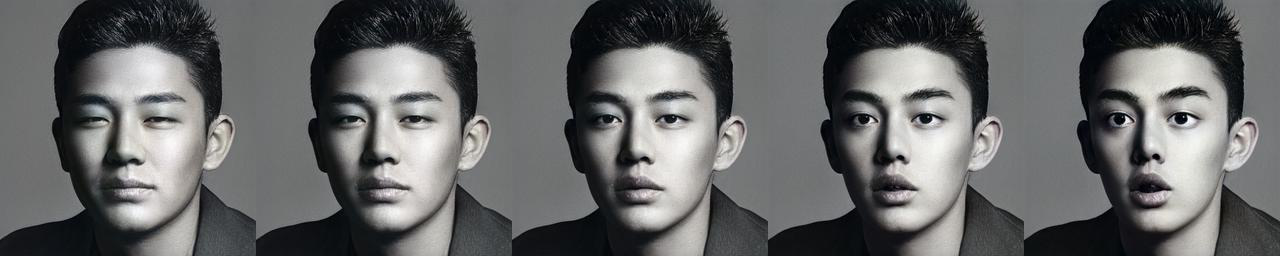

In [54]:
import PIL
PIL.Image.open('/content/stylegan2/expression/tiled/expression_31_emotion_surprise.jpg')

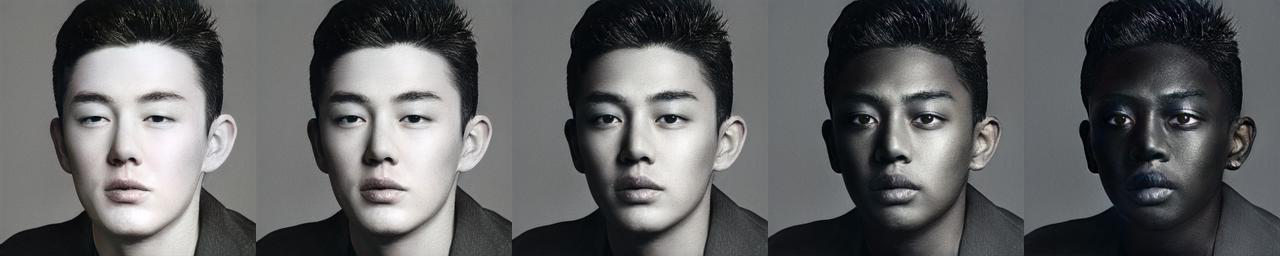

In [53]:
PIL.Image.open('/content/stylegan2/expression/tiled/expression_31_race_black.jpg')

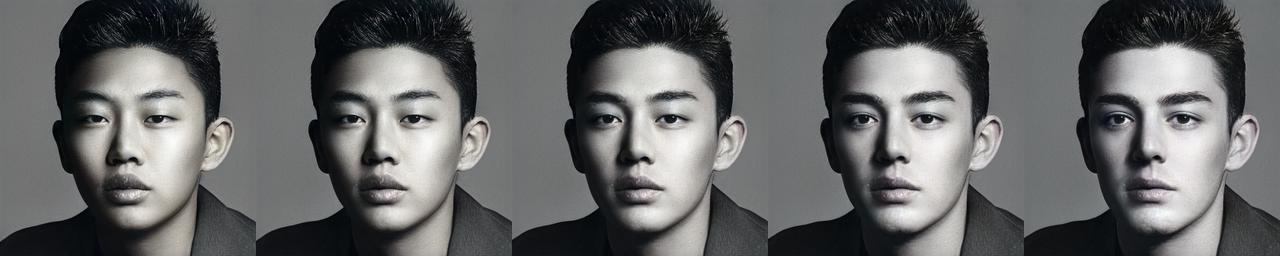

In [55]:
PIL.Image.open('/content/stylegan2/expression/tiled/expression_31_race_white.jpg')